## OLD / OUTDATED CODE

In [12]:
import functions as f
import constants as c
import classes as cl

import pandas as pd
import numpy as np
import os, joblib, time
import matplotlib.pyplot as plt
import seaborn as sb

from netwulf import visualize
print(f"Current directories in {c.cwd}\n {os.listdir()}")

long = c.cwd + "\\raw_data\\long_alzheimers.tsv"
short = c.cwd + "\\raw_data\\short_alzheimers.tsv"

Current directories in c:\Users\azzyh\GitRepo\02807_project_Group13\
 ['.git', '.gitignore', 'classes.py', 'constants.py', 'functions.py', 'joblib_vars', 'Notebook.ipynb', 'OldCode.ipynb', 'raw_data', 'README.md', '__pycache__']


In [ ]:
"""
Interaction dataset loaded for homo sapiens (HS) related data
Saving data with int. ids from id_prot
Raw Data has the headings: [protein1	protein2	neighborhood	fusion	cooccurence	coexpression	experimental	database	textmining	combined_score]

Runtime
Number of rows in HS protein links dataset: 13715404
Chunksize; reading one line per value 
Runtime when chunksize=200000; 
"""
chunksize = 200000
LinesRead = 0 
HS_int_df = pd.DataFrame() #df for storing
id_prot = joblib.load("./joblib_vars/id_prot.joblib")
logfile = open("./logs/IntRawData_logs.txt", "w")

for chunk in pd.read_csv("https://stringdb-downloads.org/download/protein.links.detailed.v12.0/9606.protein.links.detailed.v12.0.txt.gz", compression="gzip", chunksize=chunksize, sep=" "):
    print(f"Time: {time.ctime(time.time())}\tReading lines {LinesRead} - {LinesRead+chunksize}...", file=logfile)
    print(f"Time: {time.ctime(time.time())}\tReading lines {LinesRead} - {LinesRead+chunksize}...")
    chunk["protein1"] = chunk["protein1"].map(id_prot) #Changing names to id's using id_prot
    chunk["protein2"] = chunk["protein2"].map(id_prot) #Changing names to id's using id_prot
    HS_int_df = pd.concat([HS_int_df, chunk], axis=1)
    LinesRead += chunksize
    print(f"Time: {time.ctime(time.time())}\tLines read {LinesRead}/13,715,404", file=logfile)
    print(f"Time: {time.ctime(time.time())}\tLines read {LinesRead}/13,715,404")

joblib.dump(HS_int_df,"./mod_data/HS_int_df.joblib")
logfile.close()

## Percentile of combined_score value

In [10]:
df = pd.read_csv("https://stringdb-downloads.org/download/protein.links.detailed.v12.0/9606.protein.links.detailed.v12.0.txt.gz", compression="gzip", sep=" ")
all_combined_score = df["combined_score"].to_list()

[153. 171. 209. 298. 611.]


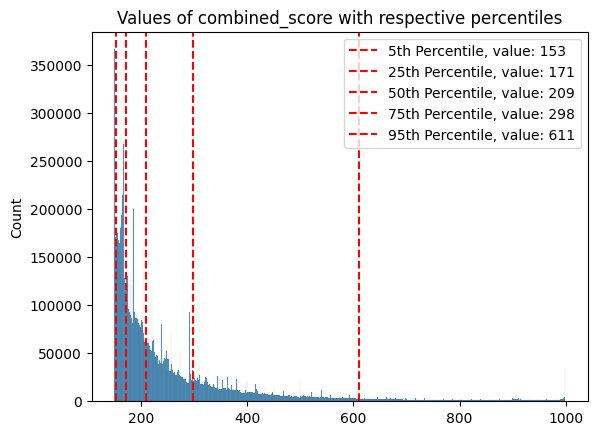

In [ ]:
percentiles = [5, 25, 50, 75, 95]
percentile_values = np.percentile(all_combined_score, percentiles)
print(percentile_values)

sb.histplot(all_combined_score)

for percentile, value in zip(percentiles, percentile_values):
    plt.axvline(value, color='red', linestyle='--', label=f'{percentile}th Percentile, value: {int(value)}')

# Add legend and show the plot
plt.ylabel("Occurrences")
plt.xlabel("combined_score value")
plt.title("Values of combined_score with respective percentiles")
plt.legend()
plt.show()